### Univariate Selection

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv("dataset/phone_price.csv")
df.shape

(2000, 21)

In [3]:
X = df.iloc[:, :20]
y = df.iloc[:, -1]

In [4]:
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X, y)

In [6]:
dfScores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(X.columns)

In [7]:
featureScores = pd.concat([dfColumns, dfScores], axis = 1)
featureScores.columns = ["Specs", "Score"]

In [8]:
featureScores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [10]:
featureScores.nlargest(10, 'Score')

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature Importance

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [12]:
model.feature_importances_

array([0.06078582, 0.02063521, 0.03494608, 0.02061816, 0.03309521,
       0.01755469, 0.03600635, 0.03503564, 0.03713371, 0.03365486,
       0.03477365, 0.0468853 , 0.04887745, 0.38102576, 0.03538208,
       0.03481985, 0.03584377, 0.01462886, 0.01802113, 0.02027643])

<AxesSubplot:>

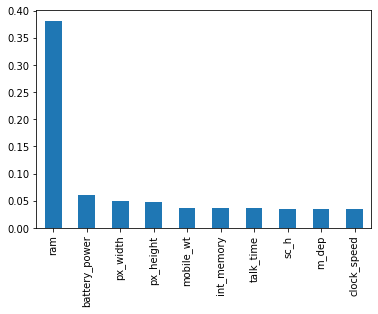

In [14]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind="bar")

### Correlatin Matrix

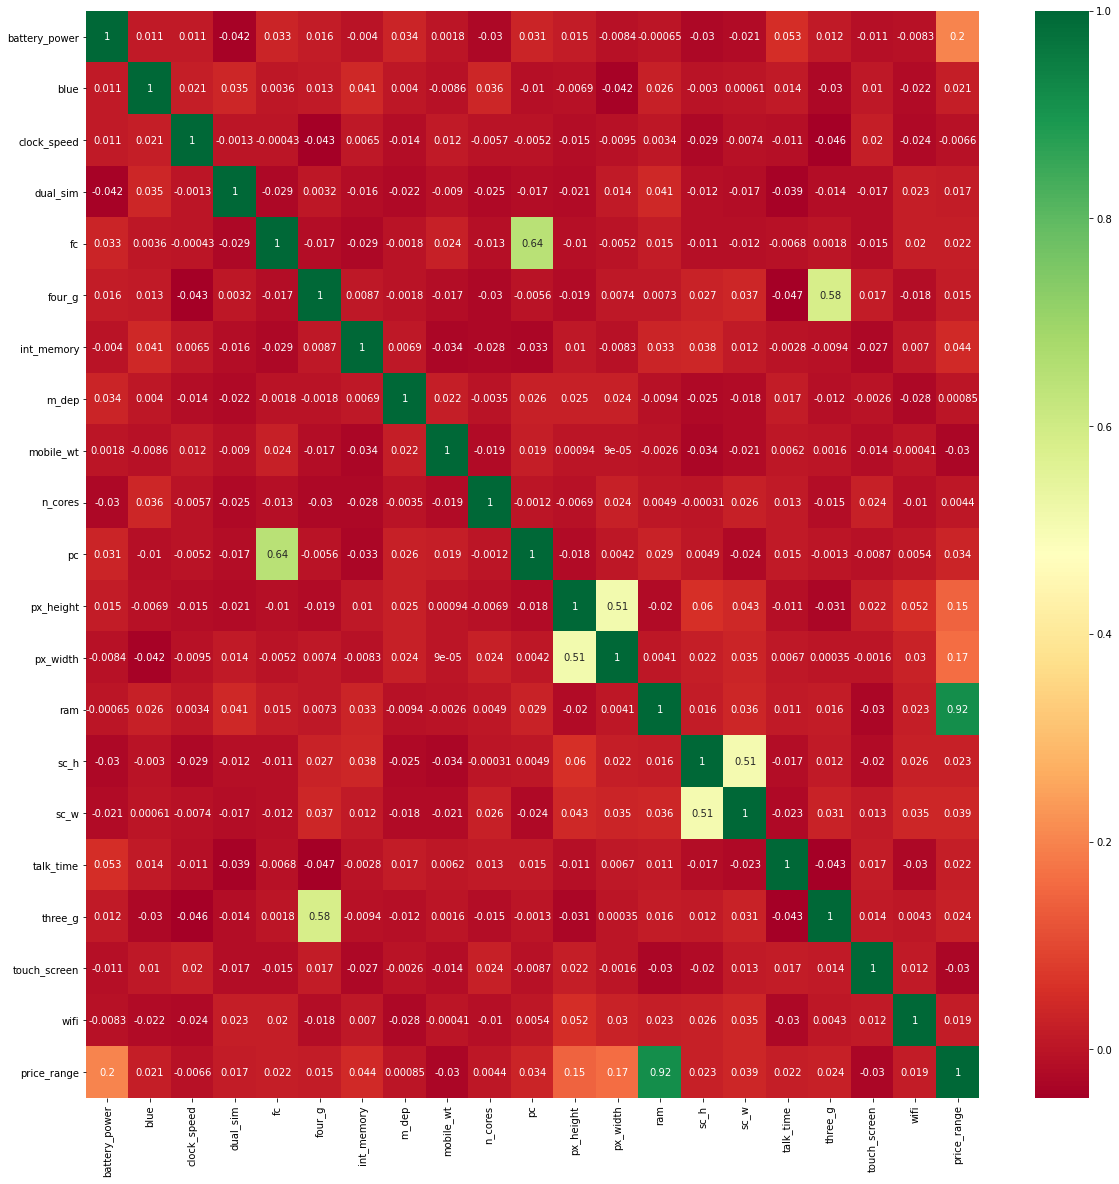

In [18]:
import seaborn as sns

correlation = df.corr()
top_feat = correlation.index

plt.figure(figsize=(20, 20))

g = sns.heatmap(df[top_feat].corr(), annot=True, cmap="RdYlGn")